In [20]:
import pylab, random, math
import numpy as np
from cvxopt.solvers import qp
from cvxopt.base import matrix

#####test data#####
classA = [(random.normalvariate(-1.5, 1), random.normalvariate(0.5, 1), 1.0) for i in range(5)] + \
         [(random.normalvariate(1.5, 1), random.normalvariate(0.5, 1), 1.0) for i in range(5)]
classB = [(random.normalvariate(0.0, 0.5), random.normalvariate(-0.5,0.5), -1.0) for i in range(10)]
data = classA + classB
random.shuffle(data)

classA1 = [(random.normalvariate(-1.5, 1), random.normalvariate(0.5, 1), 1.0) for i in range(5)] + \
         [(random.normalvariate(1.5, 1), random.normalvariate(0.5, 1), 1.0) for i in range(5)]
classB1 = [(random.normalvariate(3, 0.5), random.normalvariate(-1.5,0.5), -1.0) for i in range(10)]
data1 = classA1 + classB1
random.shuffle(data1)

In [21]:
len(data)

20

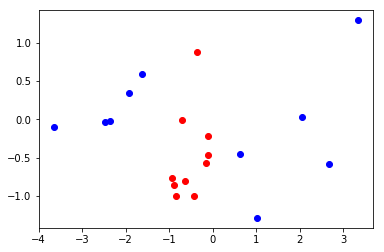

In [22]:
pylab.plot([p[0] for p in classA],[p[1] for p in classA],'bo')
pylab.plot([p[0] for p in classB],[p[1] for p in classB],'ro')
pylab.show()                                                                                                           
pylab.savefig('linear_1.png')

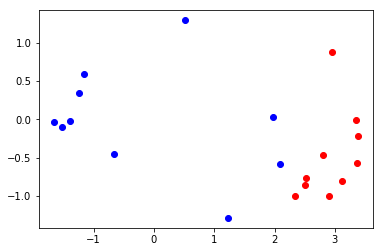

In [23]:
pylab.plot([p[0] for p in classA1],[p[1] for p in classA],'bo')
pylab.plot([p[0] for p in classB1],[p[1] for p in classB],'ro')
pylab.show()

In [24]:
def original_plot(classA,classB):
    pylab.plot([p[0] for p in classA],[p[1] for p in classA],'bo')
    pylab.plot([p[0] for p in classB],[p[1] for p in classB],'ro')
    pylab.title('Original Data')
    pylab.xlabel('X1')
    pylab.ylabel('X2')
    pylab.show() 
    
# Kernel function
def Kernel(x, y, Option, p):
    kValue = 0
    if Option == "L":  # Linear
        kValue = np.dot(x, y) + 1
    elif Option == "P":  # Poly
        kValue = pow(np.dot(x, y) + 1, p[0])
    elif Option == "R":  # RBF
        theta = p[0]
        kValue = math.exp(-np.dot(np.matrix(x)-np.matrix(y), (np.matrix(x)-np.matrix(y)).transpose())/(2*pow(theta, 2)))
    elif Option == "S":  # Sig
        k = p[0]
        eta = p[1]
        kValue = math.tanh(k*np.dot(np.matrix(x), np.matrix(y).transpose()) - eta)
    return kValue

def get_P(data, K, p):
    P = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        for j in range(len(data)):
            P[i,j] = data[i][2]*data[j][2]*Kernel(data[i][0:2], data[j][0:2], K, p)  
        
    return P

# Train data
def train_data(data,Option,*p):   
    P = get_P(data,Option,p)
    h = np.zeros((len(data), 1))
    G = np.diag([-1.0]*len(data))
    q = -1*np.ones((len(data), 1))

    r = qp(matrix(P), matrix(q), matrix(G), matrix(h))
    alpha = list(r['x'])
    #print(alpha)

    support = []
    for i in range(len(alpha)):
        if alpha[i] > 10e-5:
            support.append((data[i][0], data[i][1], data[i][2], alpha[i]))
    return support

def indicator(xstar, support, Option, p):
    ind = 0
    for i in range(len(support)):
        ind += support[i][3]*support[i][2]*Kernel(xstar, support[i][0:2], Option, p)
    return ind

def boundary_plot(classA, classB, support, Option, *p):
    xrange = np.arange(-4, 4, 0.05)
    yrange = np.arange(-4, 4, 0.05)
    grid = matrix([[indicator([x, y], support, Option, p) for y in yrange] for x in xrange])
    pylab.contour(xrange, yrange, grid, (-1.0, 0.0, 1.0), colors = ('red', 'black', 'blue'), linewidths = (1, 3, 1))
    pylab.plot([p[0] for p in classA],[p[1] for p in classA],'bo')
    pylab.plot([p[0] for p in classB],[p[1] for p in classB],'ro')
    pylab.title('Decision Boundary')
    pylab.xlabel('X1')
    pylab.ylabel('X2')
    pylab.show()

## Q1  Move the clusters around to make it easier or harder for the classifier to find a decent boundary. Pay attention to when the qt function prints an error message that it can not find a solution.

When data is linear separable, qt can find a solution?

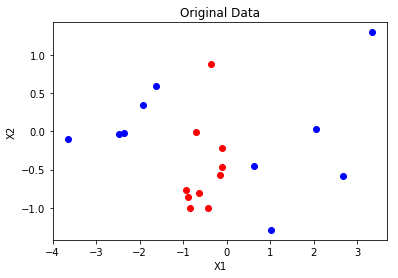

     pcost       dcost       gap    pres   dres
 0: -1.7599e+01 -4.5034e+01  3e+01  0e+00  3e+00
 1: -3.5612e+01 -3.8661e+01  3e+00  2e-15  1e+00
 2: -4.5086e+02 -4.5377e+02  3e+00  2e-14  1e+00
 3: -6.9841e+04 -6.9848e+04  7e+00  2e-12  1e+00
 4: -6.8864e+08 -6.8864e+08  7e+02  3e-08  1e+00
 5: -1.5949e+10 -1.5949e+10  1e+04  5e-07  1e+00
Terminated (singular KKT matrix).


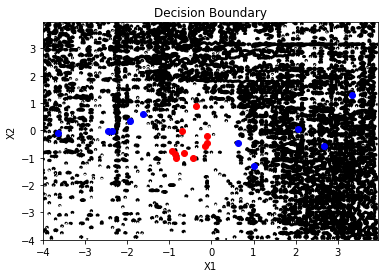

In [25]:
# for original training data
original_plot(classA, classB)
support = train_data(data,'L')
boundary_plot(classA,classB,support,'L')

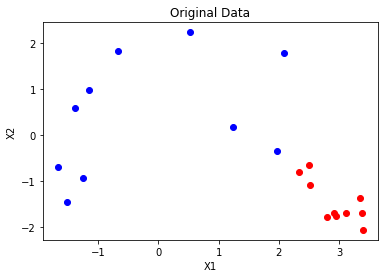

     pcost       dcost       gap    pres   dres
 0: -3.9145e+00 -9.3401e+00  6e+01  6e+00  2e+00
 1: -1.1117e+01 -1.4429e+01  2e+01  2e+00  9e-01
 2: -3.1230e+01 -2.5158e+01  1e+01  1e+00  4e-01
 3: -1.5743e+01 -2.4715e+01  9e+00  7e-15  4e-14
 4: -2.2977e+01 -2.3663e+01  7e-01  2e-16  2e-14
 5: -2.3460e+01 -2.3481e+01  2e-02  5e-15  2e-14
 6: -2.3471e+01 -2.3472e+01  5e-04  8e-15  3e-14
 7: -2.3471e+01 -2.3471e+01  5e-06  4e-15  3e-14
Optimal solution found.


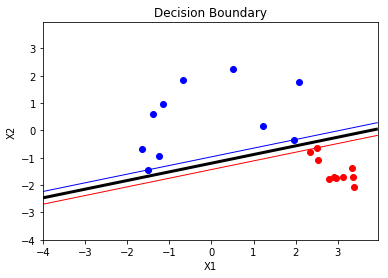

In [26]:
# for moved training data -- data1
original_plot(classA1, classB1)
support = train_data(data1,'L')
boundary_plot(classA1,classB1,support,'L')

## Q2 Implement some of the non-linear kernels. you should be able to classify very hard datasets.

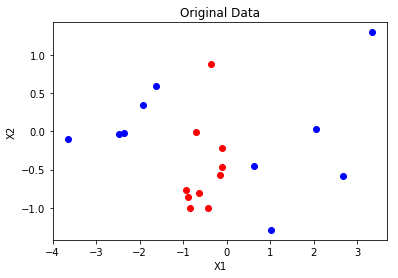

for polynomial kernels with parameter 1 to 10
parameter is:1
     pcost       dcost       gap    pres   dres
 0: -1.7599e+01 -4.5034e+01  3e+01  0e+00  3e+00
 1: -3.5612e+01 -3.8661e+01  3e+00  2e-15  1e+00
 2: -4.5086e+02 -4.5377e+02  3e+00  2e-14  1e+00
 3: -6.9841e+04 -6.9848e+04  7e+00  2e-12  1e+00
 4: -6.8864e+08 -6.8864e+08  7e+02  3e-08  1e+00
 5: -1.5949e+10 -1.5949e+10  1e+04  5e-07  1e+00
Terminated (singular KKT matrix).


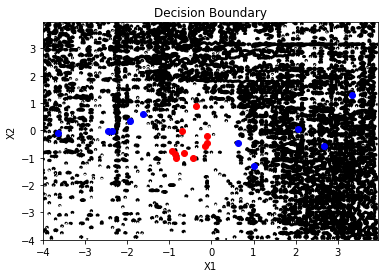

parameter is:2
     pcost       dcost       gap    pres   dres
 0: -6.8450e+00 -1.6061e+01  8e+01  8e+00  2e+00
 1: -9.7817e+00 -1.5667e+01  5e+01  5e+00  1e+00
 2: -4.8553e+00 -6.9345e+00  2e+01  2e+00  4e-01
 3: -2.4206e+00 -3.9755e+00  6e+00  4e-01  1e-01
 4: -1.5646e+00 -2.7626e+00  2e+00  7e-02  2e-02
 5: -1.8960e+00 -2.1411e+00  4e-01  1e-02  3e-03
 6: -2.0427e+00 -2.0581e+00  2e-02  5e-05  1e-05
 7: -2.0542e+00 -2.0544e+00  2e-04  7e-07  2e-07
 8: -2.0544e+00 -2.0544e+00  2e-06  7e-09  2e-09
 9: -2.0544e+00 -2.0544e+00  2e-08  7e-11  2e-11
Optimal solution found.


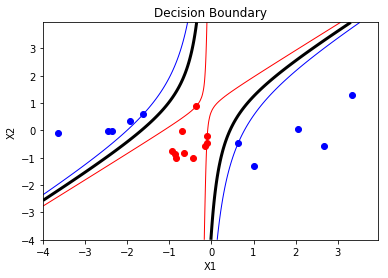

parameter is:3
     pcost       dcost       gap    pres   dres
 0: -3.7640e+00 -8.7568e+00  6e+01  6e+00  2e+00
 1: -6.9006e+00 -7.3666e+00  2e+01  2e+00  7e-01
 2: -1.2778e+00 -2.3367e+00  4e+00  2e-01  8e-02
 3: -1.0325e+00 -1.4094e+00  8e-01  4e-02  1e-02
 4: -1.0626e+00 -1.1436e+00  1e-01  4e-03  1e-03
 5: -1.0890e+00 -1.1032e+00  1e-02  5e-16  3e-15
 6: -1.0996e+00 -1.1000e+00  4e-04  3e-16  2e-15
 7: -1.0999e+00 -1.1000e+00  5e-06  2e-16  1e-15
 8: -1.1000e+00 -1.1000e+00  5e-08  3e-17  2e-15
Optimal solution found.


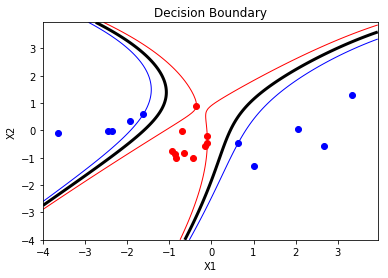

parameter is:4
     pcost       dcost       gap    pres   dres
 0: -9.7302e-01 -2.4169e+00  3e+01  5e+00  1e+00
 1: -8.3022e-01 -2.0166e+00  4e+00  5e-01  2e-01
 2: -8.1764e-01 -1.1101e+00  8e-01  8e-02  2e-02
 3: -8.1746e-01 -9.2761e-01  3e-01  3e-02  8e-03
 4: -7.6621e-01 -8.2830e-01  2e-01  1e-02  4e-03
 5: -7.5305e-01 -7.6708e-01  5e-02  2e-03  7e-04
 6: -7.5250e-01 -7.5757e-01  2e-02  9e-04  3e-04
 7: -7.4546e-01 -7.5200e-01  7e-03  2e-16  6e-14
 8: -7.5049e-01 -7.5064e-01  1e-04  4e-16  4e-15
 9: -7.5062e-01 -7.5062e-01  2e-06  2e-16  4e-15
10: -7.5062e-01 -7.5062e-01  2e-08  2e-16  2e-15
Optimal solution found.


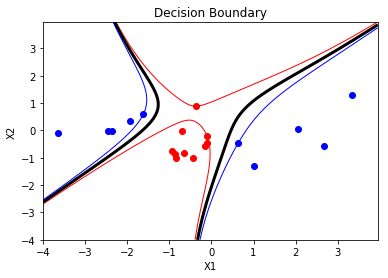

parameter is:5
     pcost       dcost       gap    pres   dres
 0: -6.7678e-01 -1.7288e+00  3e+01  5e+00  1e+00
 1: -5.2816e-01 -1.4355e+00  3e+00  4e-01  9e-02
 2: -6.1350e-01 -8.3067e-01  6e-01  7e-02  2e-02
 3: -5.6635e-01 -6.8129e-01  2e-01  1e-02  3e-03
 4: -5.7322e-01 -6.4755e-01  2e-01  8e-03  2e-03
 5: -5.8020e-01 -5.9523e-01  5e-02  2e-03  5e-04
 6: -5.7836e-01 -5.8151e-01  1e-02  4e-04  1e-04
 7: -5.7600e-01 -5.7770e-01  4e-03  8e-05  2e-05
 8: -5.7626e-01 -5.7675e-01  5e-04  2e-16  2e-14
 9: -5.7665e-01 -5.7665e-01  6e-06  1e-16  4e-15
10: -5.7665e-01 -5.7665e-01  6e-08  3e-16  6e-15
Optimal solution found.


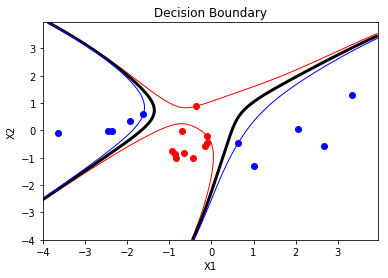

parameter is:6
     pcost       dcost       gap    pres   dres
 0: -5.1334e-01 -1.3588e+00  3e+01  5e+00  1e+00
 1: -4.2552e-01 -1.1262e+00  3e+00  4e-01  1e-01
 2: -4.5766e-01 -6.2637e-01  4e-01  4e-02  1e-02
 3: -4.4484e-01 -5.3107e-01  2e-01  9e-03  3e-03
 4: -4.7651e-01 -4.9138e-01  3e-02  1e-03  3e-04
 5: -4.7573e-01 -4.8601e-01  3e-02  1e-03  3e-04
 6: -4.7531e-01 -4.7719e-01  5e-03  1e-04  4e-05
 7: -4.7497e-01 -4.7644e-01  5e-03  9e-05  3e-05
 8: -4.7530e-01 -4.7543e-01  9e-04  2e-05  5e-06
 9: -4.7511e-01 -4.7520e-01  4e-04  6e-06  1e-06
10: -4.7509e-01 -4.7511e-01  2e-05  1e-16  1e-13
11: -4.7510e-01 -4.7510e-01  2e-07  1e-16  5e-15
Optimal solution found.


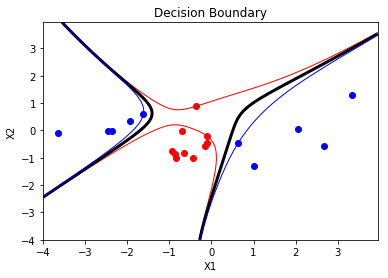

parameter is:7
     pcost       dcost       gap    pres   dres
 0: -3.8456e-01 -1.0643e+00  3e+01  5e+00  1e+00
 1: -2.8965e-01 -9.6278e-01  2e+00  3e-01  8e-02
 2: -3.6462e-01 -5.2422e-01  3e-01  3e-02  8e-03
 3: -4.1003e-01 -4.5948e-01  1e-01  9e-03  3e-03
 4: -3.8171e-01 -4.2887e-01  5e-02  5e-04  1e-04
 5: -3.9639e-01 -4.2019e-01  3e-02  2e-04  5e-05
 6: -4.0311e-01 -4.1296e-01  1e-02  3e-05  9e-06
 7: -4.0487e-01 -4.1201e-01  9e-03  2e-05  6e-06
 8: -4.0976e-01 -4.1009e-01  4e-04  7e-07  2e-07
 9: -4.1001e-01 -4.1002e-01  8e-06  1e-08  3e-09
10: -4.1002e-01 -4.1002e-01  8e-08  1e-10  3e-11
Optimal solution found.


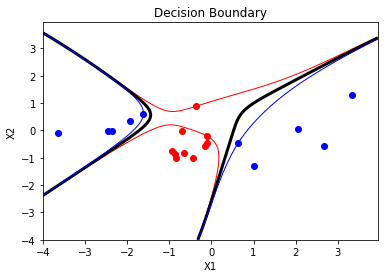

parameter is:8
     pcost       dcost       gap    pres   dres
 0: -3.2727e-01 -8.8685e-01  3e+01  5e+00  1e+00
 1: -2.3061e-01 -8.2374e-01  2e+00  2e-01  7e-02
 2: -3.2731e-01 -4.5607e-01  3e-01  3e-02  8e-03
 3: -3.6704e-01 -3.9094e-01  5e-02  4e-03  1e-03
 4: -3.2035e-01 -3.8860e-01  8e-02  7e-04  2e-04
 5: -3.5332e-01 -3.7014e-01  2e-02  1e-04  4e-05
 6: -3.6072e-01 -3.6759e-01  8e-03  5e-05  1e-05
 7: -3.6088e-01 -3.6666e-01  8e-03  4e-05  1e-05
 8: -3.6470e-01 -3.6538e-01  1e-03  4e-06  1e-06
 9: -3.6498e-01 -3.6528e-01  4e-04  2e-06  4e-07
10: -3.6504e-01 -3.6524e-01  3e-04  7e-07  2e-07
11: -3.6517e-01 -3.6519e-01  4e-05  1e-07  3e-08
12: -3.6518e-01 -3.6519e-01  4e-06  1e-16  9e-14
13: -3.6519e-01 -3.6519e-01  5e-08  1e-16  8e-15
Optimal solution found.


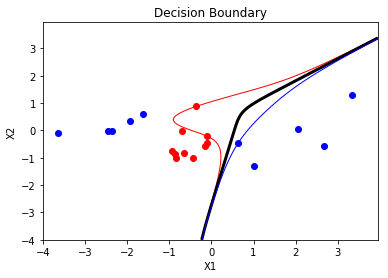

parameter is:9
     pcost       dcost       gap    pres   dres
 0: -2.9730e-01 -7.7264e-01  3e+01  5e+00  1e+00
 1: -2.1375e-01 -6.9608e-01  1e+00  2e-01  5e-02
 2: -3.0156e-01 -4.1179e-01  3e-01  3e-02  8e-03
 3: -3.3253e-01 -3.4787e-01  3e-02  2e-03  7e-04
 4: -3.3537e-01 -3.4158e-01  2e-02  1e-03  4e-04
 5: -3.2846e-01 -3.3507e-01  1e-02  3e-04  8e-05
 6: -3.3223e-01 -3.3296e-01  1e-03  2e-05  6e-06
 7: -3.3247e-01 -3.3285e-01  6e-04  9e-06  3e-06
 8: -3.3243e-01 -3.3261e-01  6e-04  9e-06  3e-06
 9: -3.3226e-01 -3.3230e-01  1e-04  8e-07  2e-07
10: -3.3227e-01 -3.3228e-01  2e-05  1e-07  4e-08
11: -3.3227e-01 -3.3228e-01  2e-05  1e-07  3e-08
12: -3.3227e-01 -3.3227e-01  6e-06  2e-08  7e-09
13: -3.3227e-01 -3.3227e-01  5e-06  1e-16  6e-14
14: -3.3227e-01 -3.3227e-01  3e-07  1e-16  7e-14
Optimal solution found.


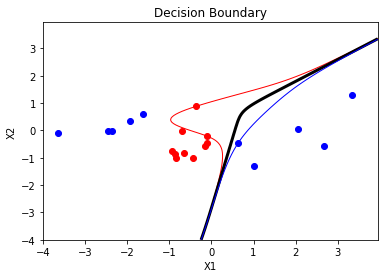

parameter is:10
     pcost       dcost       gap    pres   dres
 0: -2.8040e-01 -7.0489e-01  3e+01  5e+00  1e+00
 1: -2.2261e-01 -5.9930e-01  1e+00  1e-01  4e-02
 2: -2.8692e-01 -3.6758e-01  2e-01  2e-02  5e-03
 3: -3.0448e-01 -3.1871e-01  2e-02  2e-03  5e-04
 4: -3.0832e-01 -3.1205e-01  8e-03  5e-04  1e-04
 5: -2.9138e-01 -3.1418e-01  3e-02  8e-05  2e-05
 6: -2.9954e-01 -3.0947e-01  1e-02  3e-05  9e-06
 7: -3.0538e-01 -3.0707e-01  2e-03  3e-06  1e-06
 8: -3.0587e-01 -3.0696e-01  1e-03  2e-06  6e-07
 9: -3.0586e-01 -3.0683e-01  1e-03  1e-06  4e-07
10: -3.0660e-01 -3.0667e-01  1e-04  7e-08  2e-08
11: -3.0663e-01 -3.0667e-01  4e-05  1e-08  4e-09
12: -3.0666e-01 -3.0666e-01  2e-06  5e-10  2e-10
13: -3.0666e-01 -3.0666e-01  2e-08  5e-12  1e-12
Optimal solution found.


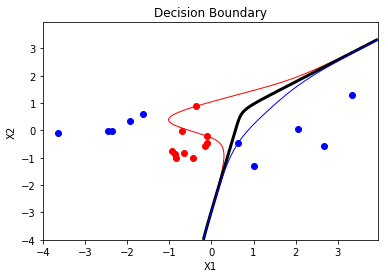

In [29]:
# implement polynomial kernel
original_plot(classA, classB)
print('for polynomial kernels with parameter 1 to 10')
for i in range(1,11):
    print('parameter is:' + str(i))
    support = train_data(data,'P',i)
    boundary_plot(classA,classB,support,'P',i)

For polynomial kernels, the kernel function is $\kappa(\vec{x},\vec{y}) = (\vec{x}^T \cdot \vec{y} + 1)^p$, $p$ controls the complexity of model. When the model becomes more complex, it can represent the training set more accurately with higher variance, it may cause overfitting. While lower p could reduce the complexity, but may produce lower variance predictions when applied beyond the training set.
In this kernel function, the linear shapes are not fitting to the data. With the increase of p, the decision boundary became wider. But when p > 3, with the increase of p, the decision boundary became thinner. 

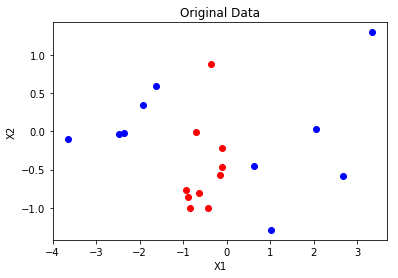

for Radial Basis Function kernels with parameter
parameter is:0.25
     pcost       dcost       gap    pres   dres
 0: -5.4364e+00 -1.3772e+01  8e+00  0e+00  2e+00
 1: -6.4722e+00 -6.9601e+00  5e-01  6e-16  2e-01
 2: -6.8219e+00 -6.9110e+00  9e-02  6e-16  3e-02
 3: -6.8468e+00 -6.8503e+00  4e-03  4e-16  3e-04
 4: -6.8484e+00 -6.8485e+00  9e-05  6e-16  4e-06
 5: -6.8485e+00 -6.8485e+00  9e-07  8e-16  4e-08
Optimal solution found.


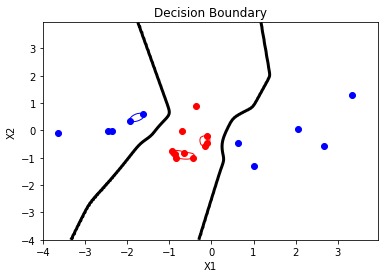

parameter is:0.5
     pcost       dcost       gap    pres   dres
 0: -4.3298e+00 -1.1811e+01  7e+00  0e+00  2e+00
 1: -5.0371e+00 -5.6278e+00  6e-01  4e-16  3e-01
 2: -5.3028e+00 -5.4246e+00  1e-01  5e-16  4e-02
 3: -5.3342e+00 -5.3486e+00  1e-02  5e-16  1e-16
 4: -5.3379e+00 -5.3388e+00  9e-04  5e-16  1e-16
 5: -5.3382e+00 -5.3383e+00  6e-05  6e-16  1e-16
 6: -5.3382e+00 -5.3382e+00  3e-06  4e-16  2e-16
Optimal solution found.


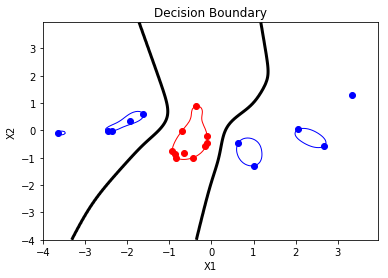

parameter is:0.75
     pcost       dcost       gap    pres   dres
 0: -3.9622e+00 -1.1519e+01  8e+00  0e+00  2e+00
 1: -4.6215e+00 -5.5390e+00  9e-01  3e-16  3e-01
 2: -5.1491e+00 -5.4789e+00  3e-01  6e-16  2e-16
 3: -5.1913e+00 -5.2292e+00  4e-02  8e-16  3e-16
 4: -5.2084e+00 -5.2107e+00  2e-03  3e-16  3e-16
 5: -5.2094e+00 -5.2095e+00  7e-05  6e-16  1e-16
 6: -5.2095e+00 -5.2095e+00  9e-07  6e-16  3e-16
Optimal solution found.


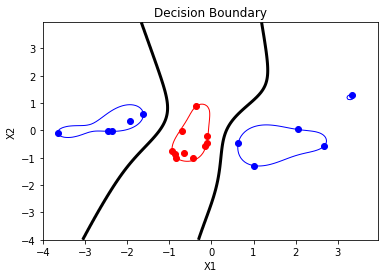

parameter is:1
     pcost       dcost       gap    pres   dres
 0: -4.1983e+00 -1.2755e+01  9e+00  0e+00  2e+00
 1: -5.1226e+00 -6.5153e+00  1e+00  3e-16  4e-01
 2: -6.6985e+00 -7.9428e+00  1e+00  7e-16  1e-01
 3: -6.9258e+00 -7.0536e+00  1e-01  1e-15  1e-02
 4: -6.9993e+00 -7.0055e+00  6e-03  2e-15  4e-04
 5: -7.0026e+00 -7.0026e+00  6e-05  1e-15  4e-06
 6: -7.0026e+00 -7.0026e+00  6e-07  1e-15  4e-08
Optimal solution found.


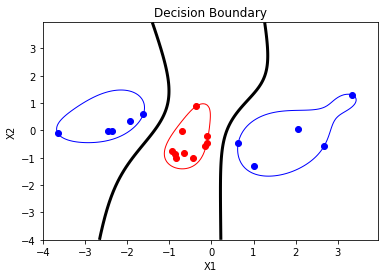

parameter is:2
     pcost       dcost       gap    pres   dres
 0: -8.3669e+00 -2.4297e+01  2e+01  0e+00  2e+00
 1: -1.2591e+01 -1.7003e+01  4e+00  9e-16  8e-01
 2: -3.1828e+01 -4.0477e+01  9e+00  8e-15  6e-01
 3: -4.3331e+01 -5.1038e+01  8e+00  6e-15  3e-01
 4: -4.5483e+01 -4.6333e+01  8e-01  9e-15  2e-02
 5: -4.5785e+01 -4.5863e+01  8e-02  5e-15  8e-04
 6: -4.5811e+01 -4.5812e+01  2e-03  1e-14  1e-05
 7: -4.5811e+01 -4.5811e+01  2e-05  9e-15  1e-07
 8: -4.5811e+01 -4.5811e+01  2e-07  6e-15  1e-09
Optimal solution found.


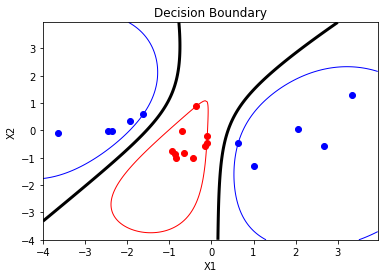

parameter is:4
     pcost       dcost       gap    pres   dres
 0: -1.5501e+01 -3.7047e+01  2e+01  0e+00  2e+00
 1: -2.8583e+01 -3.5538e+01  7e+00  9e-16  1e+00
 2: -4.0977e+01 -4.9116e+01  8e+00  2e-15  1e+00
 3: -1.5166e+02 -1.7677e+02  3e+01  1e-14  9e-01
 4: -3.5184e+02 -4.2612e+02  7e+01  2e-14  8e-01
 5: -5.4191e+02 -6.5627e+02  1e+02  4e-14  4e-01
 6: -6.0176e+02 -6.2970e+02  3e+01  2e-13  6e-02
 7: -6.0473e+02 -6.0637e+02  2e+00  9e-14  3e-03
 8: -6.0503e+02 -6.0505e+02  2e-02  1e-13  3e-05
 9: -6.0503e+02 -6.0503e+02  2e-04  1e-13  3e-07
10: -6.0503e+02 -6.0503e+02  2e-06  1e-13  3e-09
Optimal solution found.


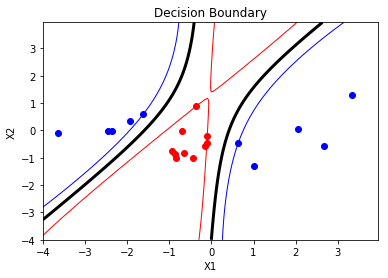

parameter is:6
     pcost       dcost       gap    pres   dres
 0: -1.8208e+01 -3.9747e+01  2e+01  0e+00  2e+00
 1: -3.6802e+01 -4.4201e+01  7e+00  1e-15  1e+00
 2: -1.5502e+02 -1.7317e+02  2e+01  6e-15  1e+00
 3: -5.3703e+02 -6.0602e+02  7e+01  6e-14  1e+00
 4: -1.3012e+03 -1.5549e+03  3e+02  2e-13  9e-01
 5: -2.2812e+03 -2.8278e+03  5e+02  2e-13  6e-01
 6: -2.8907e+03 -3.2315e+03  3e+02  6e-13  2e-01
 7: -2.9485e+03 -2.9780e+03  3e+01  3e-13  1e-02
 8: -2.9598e+03 -2.9608e+03  1e+00  2e-13  3e-04
 9: -2.9603e+03 -2.9603e+03  1e-02  3e-13  3e-06
10: -2.9603e+03 -2.9603e+03  1e-04  3e-13  3e-08
Optimal solution found.


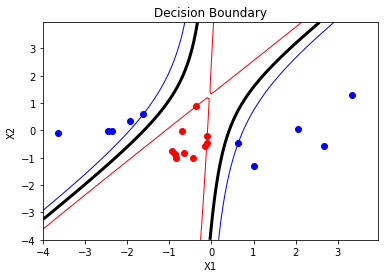

parameter is:8
     pcost       dcost       gap    pres   dres
 0: -1.9120e+01 -4.0072e+01  2e+01  0e+00  2e+00
 1: -4.1459e+01 -4.7447e+01  6e+00  2e-15  1e+00
 2: -2.1092e+02 -2.3174e+02  2e+01  2e-14  1e+00
 3: -3.7322e+02 -4.0739e+02  3e+01  3e-14  1e+00
 4: -1.0622e+03 -1.1621e+03  1e+02  8e-14  1e+00
 5: -1.8660e+03 -2.0805e+03  2e+02  1e-13  1e+00
 6: -4.0643e+03 -4.7940e+03  7e+02  5e-13  9e-01
 7: -8.0608e+03 -1.0183e+04  2e+03  1e-12  5e-01
 8: -9.2359e+03 -9.4657e+03  2e+02  1e-12  9e-03
 9: -9.2447e+03 -9.2517e+03  7e+00  1e-12  9e-05
10: -9.2464e+03 -9.2465e+03  7e-02  1e-12  9e-07
11: -9.2464e+03 -9.2464e+03  7e-04  2e-12  9e-09
Optimal solution found.


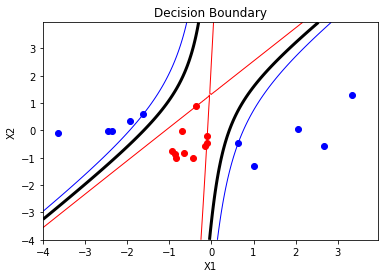

In [30]:
# for rbf kernel
original_plot(classA, classB)
print('for Radial Basis Function kernels with parameter')
for i in [0.25, 0.5, 0.75, 1, 2, 4, 6, 8]:
    print('parameter is:' + str(i))  
    support = train_data(data,'R',i)
    boundary_plot(classA,classB,support,'R',i)

higher $\sigma$ will make the decision boundary thinner, also make the boundary more smoothly. That is because with the increasement of $\sigma$, bias will be higher and variance will be lower. Higher bias and lower variance will make the model more general and avoid overfitting, the boundary could contain more data points.

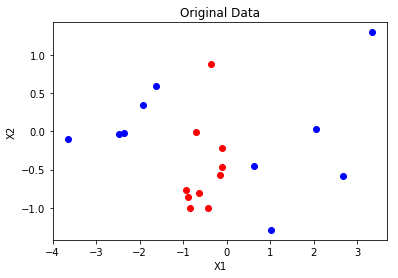

     pcost       dcost       gap    pres   dres
 0: -2.0000e+01 -4.0000e+01  2e+01  0e+00  2e+00
 1: -4.9700e+01 -5.0197e+01  5e-01  2e-15  1e+00
 2: -5.0187e+03 -5.0192e+03  5e-01  2e-13  1e+00
 3: -1.0911e+07 -1.0912e+07  1e+03  5e-10  1e+00
 4: -4.3543e+07 -4.3547e+07  3e+03  2e-09  1e+00
 5: -2.6061e+08 -2.6063e+08  2e+04  1e-08  1e+00
 6: -4.9708e+09 -4.9712e+09  4e+05  2e-07  1e+00
 7: -5.9213e+09 -5.9217e+09  4e+05  9e-07  1e+00
 8: -1.2788e+10 -1.2788e+10  6e+05  9e-07  1e+00
 9: -2.2712e+10 -2.2713e+10  4e+05  1e-06  1e+00
Terminated (singular KKT matrix).


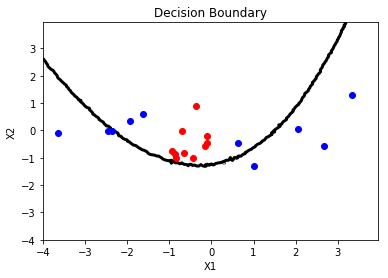

In [44]:
# for Sigmoid kernel
original_plot(classA, classB)
support = train_data(data,'S', 5*pow(10,-6), -7)
boundary_plot(classA,classB,support,'S', 5*pow(10,-6), -7)

$k=5\times 10^{-6}$ and $\delta=-7$ is the best parameters I found, because this kernel with these two parameters could get most rounds of iteration in qp method, though still terminated...